<a href="https://colab.research.google.com/github/sweta8144/Internship-Goeduhub/blob/main/Task15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task - 15**


**Name - SWETA LENKA**

**Reg no - GO_STP_11510**

**Build a spam filter using Python and the multinomial Naive Bayes algorithm.**

Check Spam or Ham? Email Classifier Using Python using MultinomialNB.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.shape

(5572, 2)

In [4]:
df.columns

Index(['Category', 'Message'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df.isna().sum()

Category    0
Message     0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


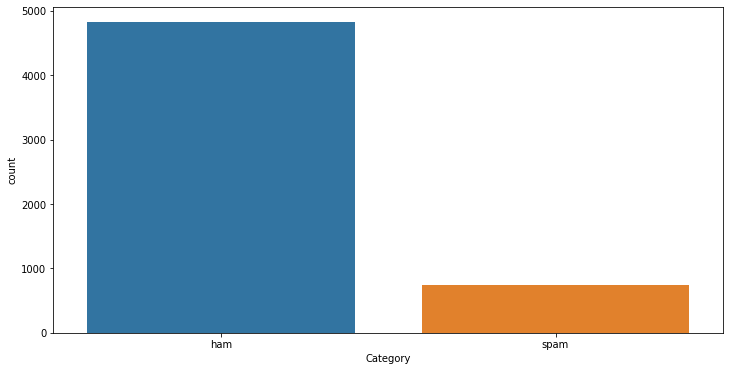

In [7]:
df['Message_Length'] = df['Message'].apply(len)

plt.figure(figsize=(12,6))
sns.countplot(df.Category)
plt.show()

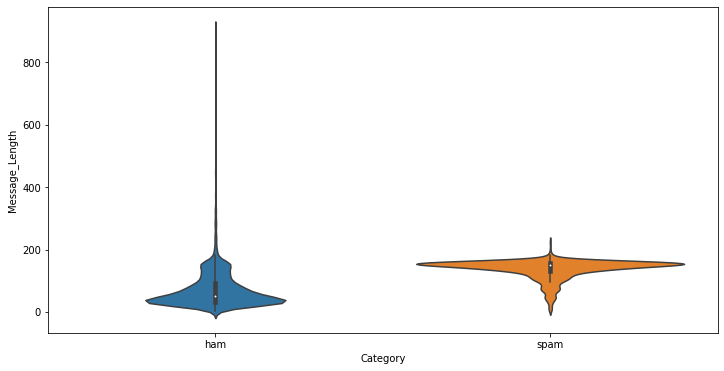

In [8]:
plt.figure(figsize=(12,6))
sns.violinplot(y='Message_Length',x='Category',data=df)
plt.show()

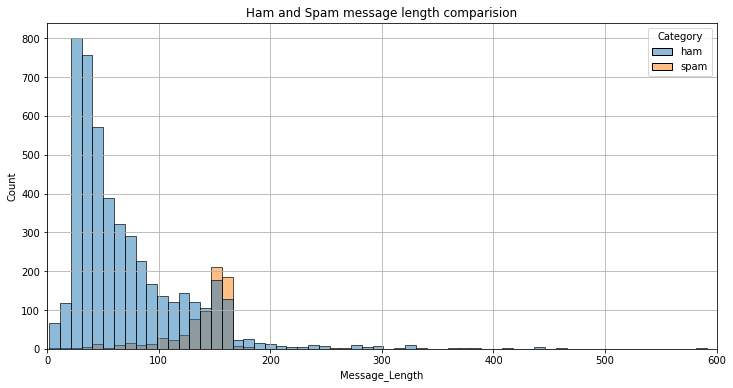

In [9]:
plt.figure(figsize=(12,6))
sns.histplot(x=df['Message_Length'],hue=df['Category'])
plt.xlim((0,600))
plt.title('Ham and Spam message length comparision')
plt.grid()
plt.show()

In [30]:
import texthero as hero
df['Message'] = hero.clean(df['Message'])

In [31]:
df.head()

,Category,Message,Message_Length
0,0,go jurong point crazy available bugis n great ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry wkly comp win fa cup final tkts 21s...,155
3,0,u dun say early hor u c already say,49
4,0,nah think goes usf lives around though,61


In [32]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [33]:
df.Category = label_encoder.fit_transform(df.Category)

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
textFeatures = df['Message'].copy()
vectorizer = TfidfVectorizer('english')
x=vectorizer.fit_transform(textFeatures)
y=df['Category']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=7)

In [36]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(x_train,y_train)

In [37]:
print(classifier.predict(x_train))
print(y_train)

[0 0 0 ... 0 0 0]
4459    0
1921    0
5255    0
5507    0
356     0
       ..
4307    0
2550    0
537     0
1220    0
4271    0
Name: Category, Length: 4457, dtype: int64


In [38]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
pred = classifier.predict(x_train)
print(classification_report(y_train,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3857
           1       1.00      0.85      0.92       600

    accuracy                           0.98      4457
   macro avg       0.99      0.93      0.95      4457
weighted avg       0.98      0.98      0.98      4457



In [39]:
print(confusion_matrix(y_train,pred))

[[3857    0]
 [  88  512]]


In [40]:
print(accuracy_score(y_train,pred))

0.9802557774287638
